# 모두카페 의뢰 내용

여러분들께 한 가지 **중요한 프로젝트를 직접 의뢰**하려고 합니다.  
워낙 정신없이 일만 하다보니까 월 매출액 정도만 간신히 알고 있을뿐,  
우리 스터디 카페의 매출 추세나 음료와 음식별 판매금액 같은 내용을 전혀 모르고 있어요.  
최근 데이터 분석이 굉장히 중요하다고는 들었는데, 구체적으로 무엇을 해야할지, 어디서부터 시작해야할지 막막하기만 합니다.  
여러분들이 **제 스터디카페 데이터를 한번 분석**해주셨으면 좋겠습니다.  
그리고 **앞으로 '모두카페'가 더 잘되기 위한 운영 전략을 제시**해주셨으면 해요.  

# 데이터셋

* entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
* sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
* item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
* item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

# 문제 정의

위 데이터셋을 토대로 아래 내용에 대한 시각화 요구.
* 월별 매출액 추세
* 가장 인기있는 음식/음료
* 가장 많이 팔린 입장권 종류

# 데이터 분석

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
# sales_data 데이터 정보 확인하기
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [6]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 데이터 분석하기

1. 월별 매출액 추세를 sales_data를 이용해서 시각화하기

In [7]:
temp_var = sales_data.copy()
# 년, 월 까지만 사용
temp_var['date'] = temp_var['결제일시'].str[:7]
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


In [8]:
# 결제금액에 ',' 때문에 문자열로 인식되어 숫자로 인식하기위해 변환.
temp_var['결제금액'] = temp_var['결제금액'].str.replace(",", "")
temp_var['결제금액'] = temp_var['결제금액'].astype('int')

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()
payment_data.head()

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
Name: 결제금액, dtype: int64

In [9]:
payment_data.rename('Payment', inplace=True)
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: Payment, dtype: int64

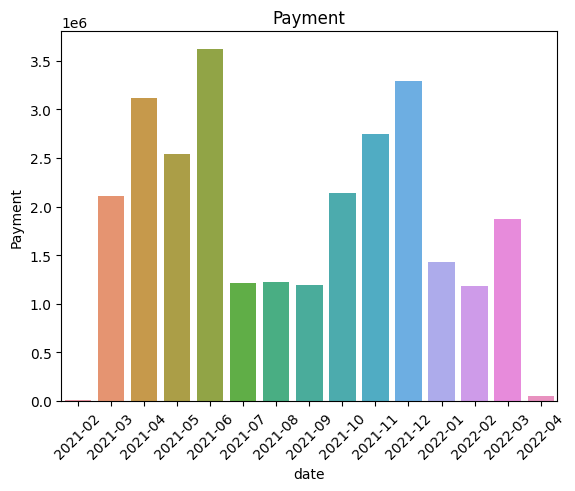

In [10]:
# 집계 결과 시각화
ax = sns.barplot(data=payment_data.reset_index(), x='date', y='Payment').set_label('')
plt.xticks(rotation=45)
plt.title('Payment')
plt.show()

2. 가장 인기 있는 음식/음료를 sales_data를 이용하여 시각화.

In [11]:
temp_var = sales_data.copy()
items_count = temp_var[temp_var['판매수량'] != -1]['상품명'].value_counts()
items_count.rename('판매수량', inplace=True)
items_count = pd.DataFrame(items_count, columns=['판매수량'])
items_count.head(10)

,판매수량
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [12]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

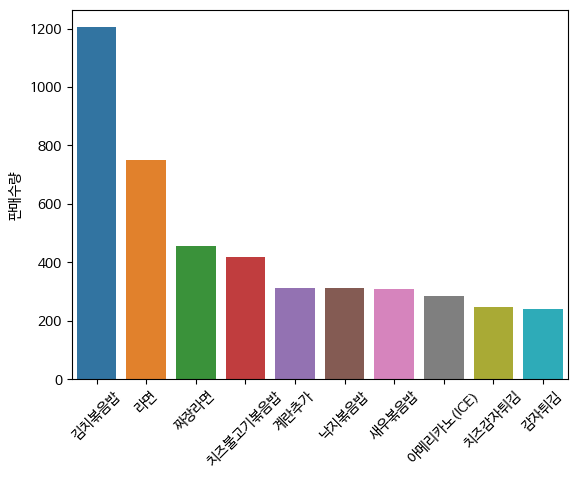

In [13]:
# 집계 결과 시각화
sns.barplot(data=items_count[:10], x=items_count[:10].index, y='판매수량')
plt.xticks(rotation=45)
plt.show(block=True)

In [14]:
# 메뉴들을 판매 매출 순으로 정렬 후 상위 10개를 뽑아 결과를 시각화.
temp_var = sales_data.copy()
temp_var['결제금액'] = temp_var['결제금액'].str.replace(",", "")
temp_var['결제금액'] = temp_var['결제금액'].astype('int')

items_payment = temp_var['결제금액'].groupby(temp_var['상품명']).sum()
items_payment = items_payment.rename('판매 매출')
items_payment = pd.DataFrame(items_payment, columns=['판매 매출']).sort_values(by='판매 매출', ascending=False)
items_payment[:10]

,판매 매출
상품명,
김치볶음밥,5971900
라면,2916000
치즈불고기볶음밥,2276100
짜장라면,2032500
낙지볶음밥,1699700
새우볶음밥,1529800
치즈감자튀김,1348700
감자튀김,1083800
아메리카노(ICE),936100


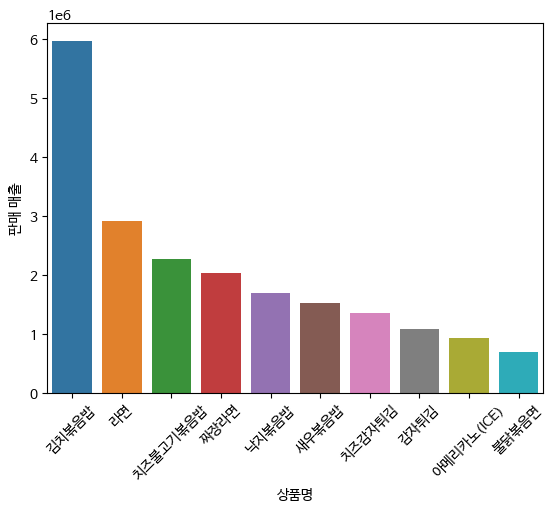

In [15]:
# 집계 결과 시각화
sns.barplot(data=items_payment[:10], x=items_payment[:10].index, y='판매 매출')
plt.xticks(rotation=45)
plt.show()

3. 가장 많이 팔린 입장권 종류를 entry_data를 사용하여 시각화

In [16]:
temp_var = entry_data.copy()
temp_var['금액'] = temp_var['금액'].astype('int')

entry_payment = temp_var['금액'].groupby(temp_var['요금제명']).sum()
entry_payment = entry_payment.rename('판매 매출')
entry_payment = pd.DataFrame(entry_payment, columns=['판매 매출']).sort_values(by='판매 매출', ascending=False)
entry_payment[:10]

,판매 매출
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


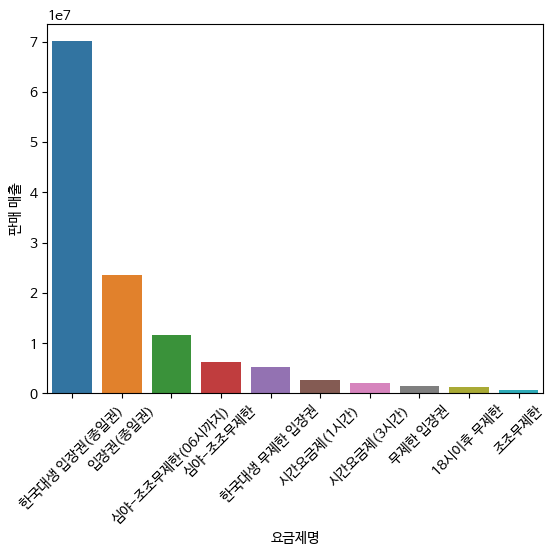

In [17]:
# 집계 결과 시각화
sns.barplot(data=entry_payment[:10], x=entry_payment[:10].index, y='판매 매출')
plt.xticks(rotation=45)
plt.show()

### 내가 정의한 문제 해결하기
내 key question을 중심으로 다양한 분석을 진행.

1. 요금제 매출 VIP 고객 탐색.  
20만 이상 소비자들을 VIP로 판단, 탐색.

In [18]:
temp_var = entry_data.copy()
entry_vip = temp_var['금액'].groupby(temp_var['고객']).sum().to_frame()
entry_vip = entry_vip.sort_values('금액', ascending=False)
entry_vip.head(10)

,금액
고객,
customer338849,949500
customer667032,478500
customer488580,314500
customer744264,279900
customer676713,277000
customer529849,240000
customer243082,240000
customer941866,239500
customer496146,237500


In [19]:
entry_vip = entry_vip[entry_vip['금액'] > 200000]
entry_vip

,금액
고객,
customer338849,949500
customer667032,478500
customer488580,314500
customer744264,279900
customer676713,277000
customer529849,240000
customer243082,240000
customer941866,239500
customer496146,237500


2. 상품 매출 VIP 고객 탐색.  
10만 이상 소비자들을 VIP로 판단, 탐색.

In [20]:
temp_var = sales_data.copy()
temp_var['결제금액'] = temp_var['결제금액'].str.replace(",", "")
temp_var['결제금액'] = temp_var['결제금액'].astype('int')
sales_vip = temp_var['결제금액'].groupby(temp_var['고객']).sum().to_frame()
sales_vip = sales_vip.sort_values('결제금액', ascending=False)
sales_vip.head(10)

,결제금액
고객,
customer667032,263500
customer499864,151300
customer977070,128800
customer859632,118500
customer581973,112500
customer910882,110000
customer917331,108500
customer621866,106500
customer575860,102500


In [21]:
sales_vip = sales_vip[sales_vip['결제금액'] > 100000]
sales_vip

,결제금액
고객,
customer667032,263500
customer499864,151300
customer977070,128800
customer859632,118500
customer581973,112500
customer910882,110000
customer917331,108500
customer621866,106500
customer575860,102500


# 전략 수립 및 실행

분석
* 월별 매출액 추세는 2021년 6월이 가장 높은 매출액, 2021년 9월이 가장 낮은 매출액
* 가장 인기있는 음식/음료는 김치볶음밥과 라면
* 가장 많이 팔린 입장권 종류는 한국대생(종일권)과 입장권(종일권)
* 입장권 20만이상 소비한 VIP 17명
* 상품 10만이상 소비한 VIP 9명

위 내용을 바탕으로 전략 수립  

* 대학가 스터디카페여서 대학 스케쥴에 따라 금액의 변동이 보임.  
* 학기 중 상시 서비스나, 시험기간에 입장권 할인 등 시도.  
* VIP들은 해당 카테고리에 맞는 할인 서비스로 지속적 이용 유치.  
* 서비스를 미끼로 설문을 통해 환경개선과 같은 피드백 받기 등 이용자의 요구사항 파악.

# 회고

* 데이터 분석 및 결과로부터 문제점 파악과 개선을 생각해보는 좋은 루틴이었다고 생각합니다.
* 하지만 위 전략 수립 중 다수의 대학가 상권의 판매전략을 바탕으로 봤을 때, VIP 전략은 시행할 필요가 없는건 아닌가 고민이 되는 사항인것 같습니다.